In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("WC_AT.csv")

In [59]:
df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   99 non-null     float64
 1   AT      99 non-null     float64
 2   Log_W   99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


In [29]:
df.describe()

,index,Waist,AT,Log_W
count,102.000000,102.000000,102.000000,102.000000
mean,52.176471,90.369608,96.843627,4.494271
std,31.626662,12.547768,52.545984,0.139921
min,0.000000,63.500000,11.440000,4.151040
25%,25.250000,79.825000,47.005000,4.379837
50%,50.500000,88.650000,90.020000,4.484677
75%,79.750000,102.375000,133.000000,4.628640
max,108.000000,112.000000,241.000000,4.718499


In [5]:
df[df.duplicated()]

,Waist,AT


In [6]:
df.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


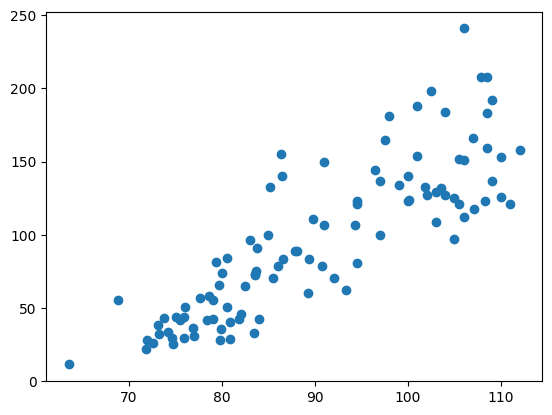

In [30]:
plt.scatter(df.Waist,df.AT)

C:\Users\Nasreen RPX\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


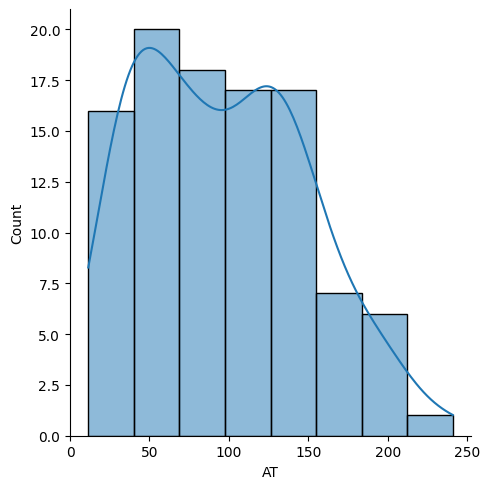

In [31]:
sns.displot(df['AT'],kde=True)

C:\Users\Nasreen RPX\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


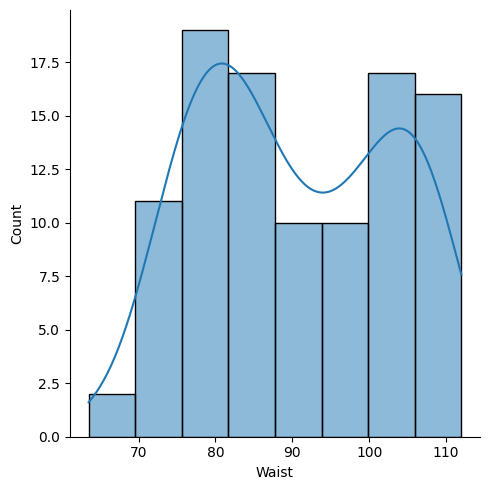

In [32]:
sns.displot(df['Waist'],kde=True)

In [10]:
df.skew()

Waist    0.134056
AT       0.584869
dtype: float64

In [11]:
df.kurt()

Waist   -1.102667
AT      -0.285576
dtype: float64

In [41]:
import statsmodels.formula.api as smf
model=smf.ols("AT~Waist", data = df).fit()

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     254.9
Date:                Tue, 07 May 2024   Prob (F-statistic):           6.79e-29
Time:                        19:57:12   Log-Likelihood:                -460.78
No. Observations:                  99   AIC:                             925.6
Df Residuals:                      97   BIC:                             930.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -207.6675     19.016    -10.920      0.000    -245.410    -169.925
Waist          3.3478      0.210     15.966      0.000       2.932       3.764
==============================================================================
Omnibus:                        9.458   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.400
Skew:                           0.730   Prob(JB):                      0.00909
Kurtosis:                       3.381   Cond. No.                         668.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model.resid.mean()

-6.779490322848662e-14

In [15]:
df['Log_W']=np.log(df['Waist'])

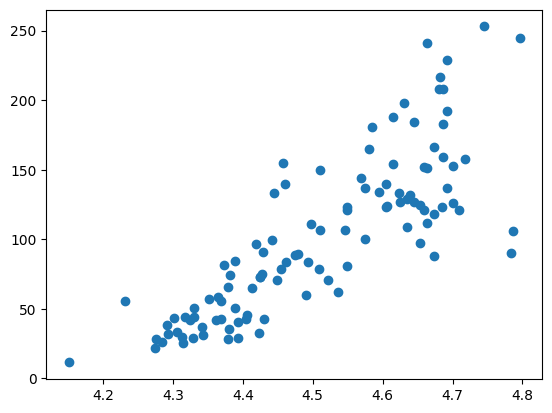

In [16]:
plt.scatter(df.Log_W,df.AT)

In [17]:
df.corr()

,Waist,AT,Log_W
Waist,1.000000,0.818558,0.997588
AT,0.818558,1.000000,0.821778
Log_W,0.997588,0.821778,1.000000


<Axes: ylabel='Frequency'>

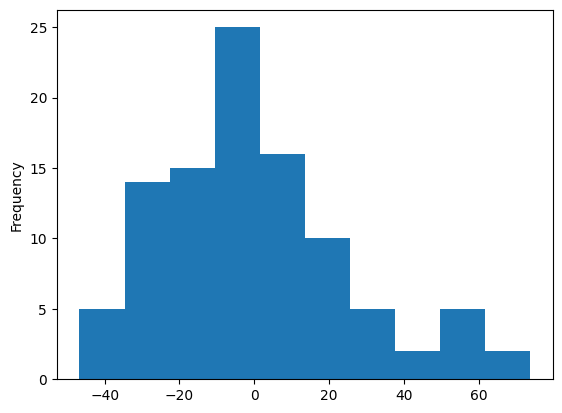

In [49]:
model.resid.plot(kind='hist')

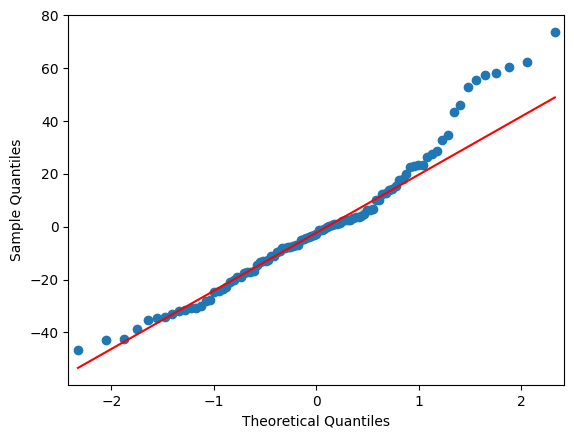

In [50]:
import statsmodels.api as sm
qqpllot=sm.qqplot(model.resid, line='q')

In [20]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence= model.get_influence()
(c, _)=model_influence.cooks_distance

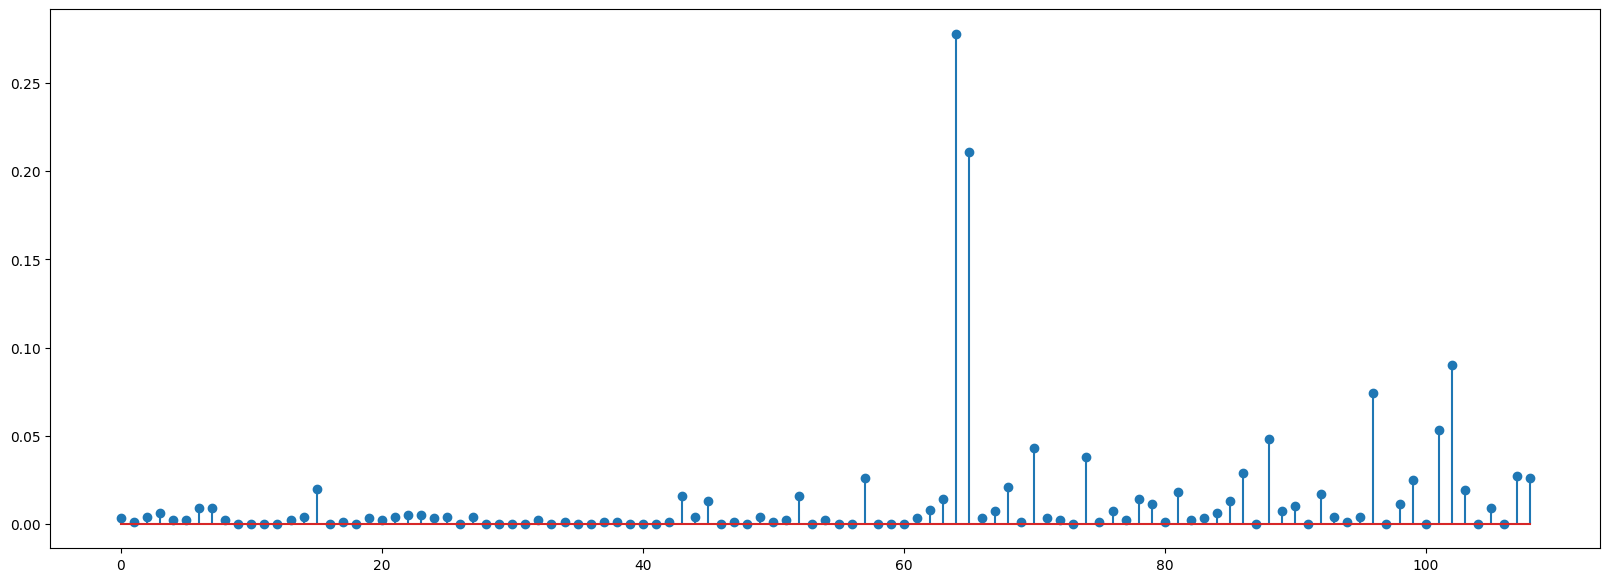

In [21]:
fig=plt.subplots(figsize=(20,7))

plt.stem(np.arange(len(df)),np.round(c,3))
plt.show()

In [22]:
df.drop([64,65,70,74,88,101,102], axis=0, inplace=True)

In [23]:
df.head()

,Waist,AT,Log_W
0,74.75,25.72,4.314149
1,72.60,25.89,4.284965
2,81.80,42.60,4.404277
3,83.95,42.80,4.430221
4,74.65,29.84,4.312811


In [24]:
df=df.reset_index() 

In [25]:
print(df.index)

RangeIndex(start=0, stop=102, step=1)


In [35]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence1= model.get_influence()
(c, _)=model_influence1.cooks_distance

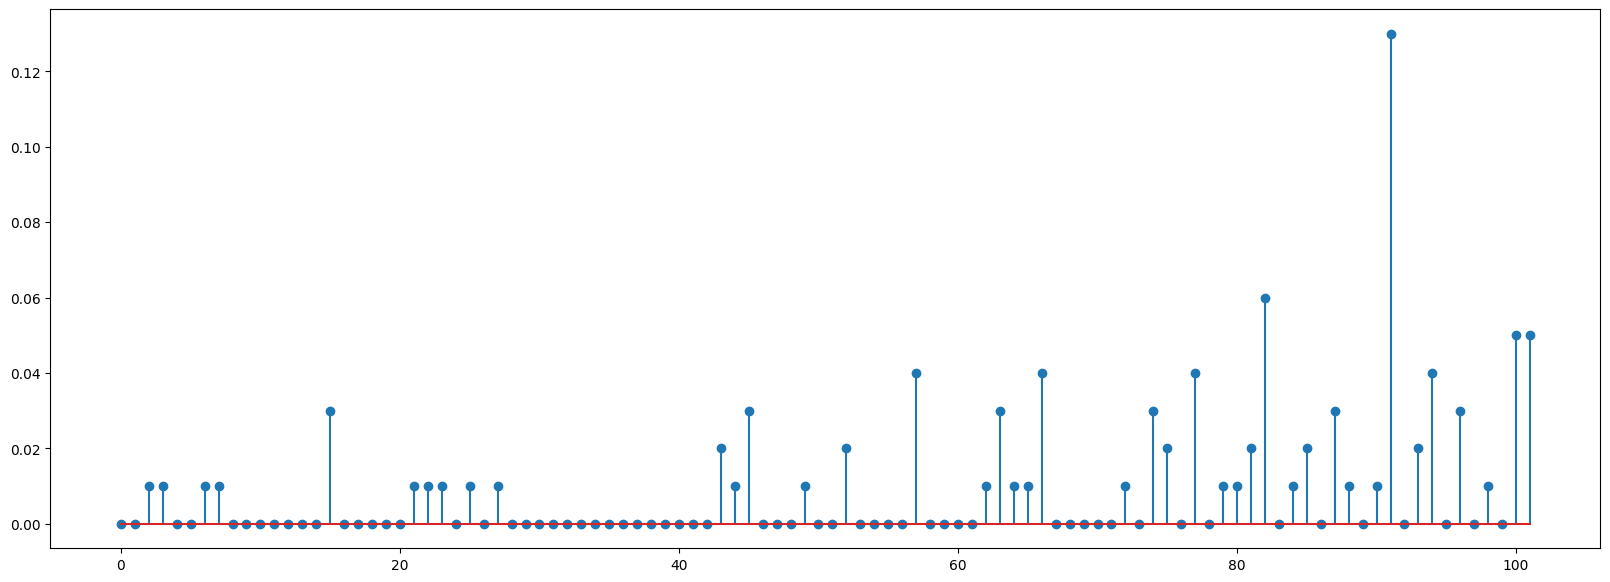

In [36]:
fig=plt.subplots(figsize=(20,7))
ln=len(df)
plt.stem(np.arange(ln),np.round(c,2))
plt.show()

In [48]:
(np.argmax(c),np.max(c))

(91, 0.13412357381053147)

In [38]:
df.drop([91,101,100,], axis=0, inplace=True)

In [51]:
model1=smf.ols("AT~Log_W", data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     254.9
Date:                Tue, 07 May 2024   Prob (F-statistic):           6.79e-29
Time:                        20:01:28   Log-Likelihood:                -460.78
No. Observations:                  99   AIC:                             925.6
Df Residuals:                      97   BIC:                             930.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -207.6675     19.016    -10.920      0.000    -245.410    -169.925
Waist          3.3478      0.210     15.966      0.000       2.932       3.764
==============================================================================
Omnibus:                        9.458   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.400
Skew:                           0.730   Prob(JB):                      0.00909
Kurtosis:                       3.381   Cond. No.                         668.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
print(df.index)

RangeIndex(start=0, stop=99, step=1)


In [53]:
df=df.reset_index() 

In [55]:
df.head()

,index,Waist,AT,Log_W
0,0,74.75,25.72,4.314149
1,1,72.60,25.89,4.284965
2,2,81.80,42.60,4.404277
3,3,83.95,42.80,4.430221
4,4,74.65,29.84,4.312811


In [56]:
df.drop(['index'],axis=1,inplace=True)

In [57]:
print(df.index)

RangeIndex(start=0, stop=99, step=1)


In [58]:
df.head()

,Waist,AT,Log_W
0,74.75,25.72,4.314149
1,72.60,25.89,4.284965
2,81.80,42.60,4.404277
3,83.95,42.80,4.430221
4,74.65,29.84,4.312811


In [ ]:
final_model=model # as both models have same values